# Hamiltonian Monte Carlo<br><sub>Not quite NUTS but just unhinged enough to give you the right ideas</sub><!-- https://www.johndcook.com/t_normal_mixture.pdf -->

<!--
$\begin{align}
\frac{1}{\sqrt{2\pi}} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)}  \int  e^{-\frac{1}{2}\tau_i(y_i^2 + \nu) } \tau_i^{\frac{\nu+1}{2}-1} d\tau_i &={} \frac{1}{\sqrt{2\pi}} \frac{\sqrt{\frac{\nu}{2}}}{\sqrt{\frac{\nu}{2}}} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \Gamma \left(\frac{\nu+1}{2}\right) \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}} \\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac {\frac{\nu}{2}^{\frac{\nu+1}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \Gamma \left(\frac{\nu+1}{2}\right) \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}}\\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac{\Gamma \left(\frac{\nu+1}{2}\right)}{\Gamma \left(\frac{\nu}{2}\right)} \frac{\nu}{2}^{\frac{\nu+1}{2}} \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}}\\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac{\Gamma \left(\frac{\nu+1}{2}\right)}{\Gamma \left(\frac{\nu}{2}\right)} \left(\frac{y_i^2}{\nu} + 1\right)^{-\frac{\nu+1}{2}}
\end{align}$
-->

## Hamiltonian Dynamics

Consider the **negative log joint probability distribution** for random varialbes $\theta$ and $v$ with $\dim(v)=\dim(\theta)$ 

$$\Large
\begin{align}
- \log p(\theta, v) = {} & - \log p(\theta) p(v|\theta)   \\
 = {} & - \log p(\theta) - \log p(v|\theta)   \\
H(\theta, v) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v) \quad \textrm{ by assuming } \quad  \theta \perp\!\!\!\perp v
\end{align}$$

> You care about sampling value from $\theta$ but $v$ is a completely **auxilliary variable** that you just made up and augmented $\theta$ through $K(v|\theta)$ which which probably just independent $K(v)$

#### <u>Physics people:</u>

This will define a **hamiltonian dynamics system** which decomposes the **total energy** $H(\theta, v)$ into 
- **potential energy** $U(\theta)$ and 
- **kinetic energy** $K(v)$, which is often called **momentum** or **velocity**

if it is defined to evolve according to differential equations 

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}\\
\end{align*}$$

which induce the **law of conservation of energy**


#### <u>Statistics people:</u>

The **energies** $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ evolve over time but the **total energy**, defined to be the log joint density $\log p(\theta_0, v_0\color{gray}{|x}) = \log p(\theta_t, v_t\color{gray}{|x})$ remains constant

#### <u>Physics people:</u>

The variables $\theta$ and $v$ are evolved over time so the **potential** $U(\theta)$ and **kinetic** $K(v)$ **energy** are always inversely synchronized and the **total energy** remains constant

#### <u>Statistics people:</u>

You're walking on the countours of a distribution

- [Radford Neal "MCMC using Hamiltonian dynamics"](https://arxiv.org/pdf/1206.1901)
- [Michael Betancourt "A Conceptual Introduction to Hamiltonian Monte Carlo"](https://arxiv.org/pdf/1701.02434)
- [Alex Rogozhnikov "Hamiltonian Monte Carlo explained"](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html)

### Normal Energy

If $p(\theta, v)$ is an **isotropic bivariate normal distribution** then 

$$H(\theta, v) = \log p(\theta, v) \overset{\large \theta \perp\!\!\!\perp v}{=} \log[p(\theta)q(v)] = \log p(\theta) + \log q(v) = U(\theta) + K(v) = \frac{1}{2}\theta^2 +\frac{1}{2}v^2$$

and **conservation of energy** $U(\theta) + K(v)$ is achieved if 

\begin{align} \frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta} \\ & = {} \frac{dK}{dv} = v & & = {}   -\frac{dU}{d\theta}= -\theta  \end{align}

## Differential Equations

The paths of $\theta$ and $v$ which which satisfy these differential equations have the form

$$
\begin{align}
\theta_t &={} r \cos(a + t)  & v_t  &={} -r \sin(a + t)\\
\frac{d}{dt}\theta_t  &={} -r \sin(a + t)   & \frac{d}{dt} v_t  &={} -r \cos(a + t)\\
 &={} v_t &  &={} - \theta_t
\end{align}
$$

and they evolve $\theta_t$ and $v_t$ on the contours of a unit circle (which are the contours of an isotropic bivariate normal distribution).


In [ ]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [ ]:
# for example
r,a = 1,0 
t = np.linspace(0,10,1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4));

ax[0].plot(r*np.cos(a+t), label='$\\theta_t$')
ax[0].plot(-r*np.sin(a+t), label='$v_t$')
ax[0].legend()

ax[1].plot(np.cos(t), -np.sin(t), 'k')
ax[1].set_xlabel('$\\theta_t = \\cos(t)$')
ax[1].set_ylabel('$v_t = -\\sin(t)$')
ax[1].set_aspect('equal', adjustable='box') 

plt.tight_layout()

## Symplectic Integration<br>(discretely approximated differential equations)


> These processes are referred to as integration because they compute a summation series just like how Riemann sums add up areas under a curve (or how Monte Carlo integration estimates this by averaging up "randomly sampled points" of the curves height). Indeed, solutions to differential equations must be the integrals of the functions which when differentiated solve the equations. 


The following numerically approximate the solution trajectory of differential equations.

1. ***Euler's method***: not a ***symplectic integrator***

$$\begin{align} 
\theta_{t+\epsilon} & = {} \theta_t + \epsilon \frac{d\theta_t}{d t} &
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_t}{d t}\\
& = {} \theta_t + \epsilon v_t &
& = {} v_t - \epsilon \theta_t
\end{align}$$


2. ***Euler's method*** (***improved variant***): a ***first order symplectic integrator***

$$\begin{align} 
\theta_{t+\epsilon} & = {} \theta_t + \epsilon \frac{d\theta_t}{d t} & 
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_{t+\epsilon}}{d t}\\
& = {} \theta_t + \epsilon v_t &
& = {} v_t - \epsilon \theta_{t+\epsilon}
\end{align}$$


3. The ***leapfrog method*** (or ***leapfrog integration***): a  ***second order symplectic integrator***

$$\begin{align} 
\theta(t+\epsilon/2) & = {} \theta_t + \frac{\epsilon}{2} \frac{d\theta_t}{d t} &
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_{t+\epsilon/2}}{d t} &
\theta_{t+\epsilon} & = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} \frac{d\theta_{t + \epsilon}}{d t}\\
& = {} \theta_t + \frac{\epsilon}{2} v_t&
& = {} v_t - \epsilon \theta_{t+\epsilon/2}&
& = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} v_{t+\epsilon}
\end{align}$$



In [ ]:
t = np.linspace(0,2*np.pi, 100)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8)) 

for i in range(3):
    ax[i].plot(np.cos(t), -np.sin(t), 'k')
    ax[i].set_aspect('equal', adjustable='box')
    
ax[0].set_title("Euler's Method (not Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .3
for i in range(20):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t
    ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=5) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon 

ax[1].set_title("Modified Euler's (First Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .75
for i in range(50):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    ax[1].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    
ax[2].set_title("The Leapfrog Method (Second Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .1
for i in range(50):
    v_t_e = v_t - epsilon / 2 * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    v_t_e = v_t_e - epsilon / 2 * theta_t_e
    ax[2].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=10) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon

## Hamiltonian Monte Carlo<br><sub>Remember Metropolis-Hastings...</sub>


To produce draws from $p(x^{(t)})$ samples from a **proposal distribution** $\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$ and "flip a coin" to accept or reject the proposal according to 

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

---

1. Randomly sampling a number of discrete approximation steps (from some discrete distribution you choose)


2. Evolve to $\theta_t$ and $v_t$ with **symplectic integration** to create a **Metropolis-Hastings** proposal distribution $\tilde p( \theta_t,  v_t|\theta_0,v_0)$ with an **aceptance probability** of $1$

  $$\require{cancel}\min\left(1,\cancel{\frac{p( \theta_t,  v_t|x)}{p(\theta_0,v_0|x)}}^1\cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1\right)$$ 

  assuming 
  1. proposals $ \theta_t$ and $ v_t$ are on the same **contour** of the **log joint probability distribution** as initial values $\theta_0$ and $v_0$ (so the first ratio cancels) 
  2. and the symplectic integration is **reversibly symmetric** (so the second ratio cancels)
  
  <u>*Pause: do not yet accept this transition.*</u>


3. **Symmetrically randomly** perturb the **momentum** $v_t$ to $v_t+\epsilon$ to incease or decrease the overall **energy** up or down to higher or lower levels of the contours of the **log joint probability distribution** and accept now accept the full **Metropolis-Hastings** proposal with an **aceptance probability** of 

   $$\require{cancel}\min\left(1,{\frac{p( \theta_t, v_t+\epsilon|x)}{p(\theta_t,v_t|x)}}\cancel{\frac{\tilde q(\theta_t,v_t)|\theta_t,v_t+\epsilon)}{\tilde q(\theta_t,v_t+\epsilon| \theta_t,  v_t)}}^1 \cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1 \right)$$

  where the second proposal distribution $\tilde q(\theta_t,  v_t+\epsilon|\theta_t,v_t)$ ratio cancels due to the symmetry.


In [ ]:
t = np.linspace(0, 2*np.pi, 100)  # 生成 0到 2*np.pi 之间的 100个点
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
ax[0].plot(np.cos(t), -np.sin(t)) 
ax[0].set_aspect('equal', adjustable='box') 
ax[1].set_aspect('equal', adjustable='box')  
ax[0].set_title("(Second Order Symplectic) Leapfrog Method") 
ax[1].set_title("Exponentiated Energy Distribution")  
ax[2].set_title("Marginal Distribution of Interest")  

theta_t, v_t, t, epsilon = 0, 1, 0, 0.1  # 初始化 theta_t（位置）为 0, v_t（动量）为1, t（时间）为 0, epsilon（步长）为 0.1

m = 1000  # 设定总迭代次数 m 为 1000
theta_ts = np.zeros(m)  # 初始化 theta_ts 数组用于存储每步的 theta_t 值
v_ts = np.zeros(m)  # 初始化 v_ts数组用于存储每步的v_t值

plotting = 50  # 前50次迭代用于绘图
accept = 0  # 初始化 MH 接受计数器为0

for j in range(m):  # 对每个迭代步 j（从0到 m-1）进行循环
    v_t_prop = v_t + stats.norm(scale=0.5).rvs()  # 生成提议的 v_t (加入 Gaussian noise, scale=0.5)
    MH_acceptance_probability = min(1, stats.norm().pdf(v_t_prop) / stats.norm().pdf(v_t))  # 计算 MH 接受概率
    if stats.uniform().rvs() < MH_acceptance_probability:  # 若随机数小于 MH 接受概率
        v_t = v_t_prop  # 则接受提议, 更新 v_t
        accept += 1  # MH接受计数器加1

    for i in range(stats.poisson(15).rvs()):  # 进行随机次数的 Leapfrog 步骤 (次数服从 Poisson分布, 均值=15)
        v_t_e = v_t - epsilon/2 * theta_t  # 计算动量第一个半步更新 (first half-step update)
        theta_t_e = theta_t + epsilon * v_t_e  # 计算位置全步更新 (full-step update)
        v_t_e = v_t_e - epsilon/2 * theta_t_e  # 计算动量第二个半步更新 (second half-step update)
        if j < plotting:  # 若当前迭代步小于 plotting (仅前 50 次绘图)
            ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], color=['r','k'][i%2])  # 绘制 Leapfrog 轨迹, 颜色交替 red 与 black
        theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon  # 更新状态: theta_t, v_t 及时间 t

    if j < plotting:  # 若当前迭代步小于 plotting
        ax[0].scatter(theta_t, v_t, s=50, color='orange')  # 绘制当前状态点

    theta_ts[j] = theta_t  # 将当前 theta_t 存入 theta_ts 数组
    v_ts[j] = v_t  # 将当前 v_t 存入 v_ts 数组

ax[1].scatter(theta_ts, v_ts)  # 在第二个子图绘制 theta 与 v的散点图 (Joint Distribution)
ax[2].hist(theta_ts, density=True)  # 在第三个子图绘制 theta的直方图 (边缘分布, density=True)
ax[2].plot(sorted(theta_ts), stats.norm().pdf(sorted(theta_ts)))  # 绘制标准正态分布 PDF 作为对比
accept/m  # 计算并返回 MH 接受率

### Hamiltonian Monte Carlo is just smart Metropolis-Hastings<br>that might actually work in high dimensions<br><sub>Random perturbations in high dimesions just like uniform random samples in high dimensions<br>will not land on the density of interest... high dimensional space is too big...</sub>


## High Dimensional Space is Big and Weird and Not What You Think It Is (Part A)

In [ ]:
# target
p_x_pdf = lambda x: stats.norm().pdf(x)  # 定义 目标分布 的 pdf 函数
mh_tuning_parameter = 1.25  # 设置 MH 调参 参数 为 1.25
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=mh_tuning_parameter)  # 定义 条件提议分布 q( x_t | x_(t-1) )
proposal_distribution = q_xt_given_xtm1  # 将 条件提议分布 赋值给 proposal_distribution

m = 1000  # 设定 总迭代次数 m 为 1000
x = np.zeros(m)  # 初始化 样本数组 x, 长度 为 m
rejections = 0  # 初始化 拒绝次数 为 0

for t in range(1, m):  # 对 t 从 1 到 m-1 进行迭代
    x_tilde = proposal_distribution(x[t-1]).rvs()  # 生成 候选样本 x_tilde (使用 proposal_distribution)
    acceptance_probability = min(1, p_x_pdf(x_tilde) / p_x_pdf(x[t-1]))  # 计算 MH 接受概率
    if stats.uniform().rvs() < acceptance_probability:  # 若 随机数 小于 MH 接受概率
        x[t] = x_tilde  # 接受 候选样本, 更新 x[t]
    else:
        x[t] = x[t-1]  # 否则 保持 上一状态
        rejections += 1  # 拒绝次数 加 1

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  
ax[0].plot(x)  # 绘制 样本 x 的时间序列图
ax[1].hist(x, density=True)  # 绘制 样本 x 的 直方图 (归一化, density=True)
x_support = np.linspace(-4, 4, 301)  # 定义 支持域 x_support, 从 -4 到 4, 共 301 个点
ax[1].plot(x_support, p_x_pdf(x_support))  # 在直方图上叠加目标分布的 pdf 曲线


In [ ]:
# target stats.multivariate_normal
D = 20  # 设定维度 D 为20
p_x_pdf = lambda x: stats.multivariate_normal(mean=np.zeros(D), cov=np.eye(D)).pdf(x)  # 定义目标分布的 pdf 函数 p_x_pdf
mh_tuning_parameter = 0.1  # 设置 MH 调参参数 mh_tuning_parameter 为 0.1
q_xt_given_xtm1 = lambda x: stats.multivariate_normal(mean=x, cov=mh_tuning_parameter*np.eye(D))  # 定义条件提议分布 q( x_t | x_(t-1) )
proposal_distribution = q_xt_given_xtm1  # 赋值 proposal_distribution 为 q_xt_given_xtm1

m = 10000  # 总迭代次数 m 为10000
x = np.zeros((D, m))  # 初始化样本数组 x，形状为 (D, m)
rejections = 0  # 初始化拒绝计数器 rejections 为0
for t in range(1, m):  # 对 t 从 1到 m-1 进行迭代
    x_tilde = proposal_distribution(x[:, t-1]).rvs()  # 生成候选样本 x_tilde（MVN 仍为 symmetric proposal）
    acceptance_probability = min(1, p_x_pdf(x_tilde) / p_x_pdf(x[:, t-1]))  # 计算 MH 接受概率 acceptance_probability
    if stats.uniform().rvs() < acceptance_probability:  # 如果随机数小于接受概率
        x[:, t] = x_tilde  # 接受候选样本，更新 x[:, t]
    else:
        x[:, t] = x[:, t-1]  # 否则保持上一状态
        rejections += 1  # 拒绝计数器加1

fig, ax = plt.subplots(2, 2, figsize=(10, 5))  

demo = 100  # 演示样本数 demo 为 100
demo_D = 3  # 演示维度 demo_D 为3
for d in range(demo_D):  # 对前 demo_D 个维度进行可视化
    ax[0, 0].plot(x[d, :demo])  # 绘制第 d 个维度前 demo 个样本的时间序列
    ax[0, 1].hist(x[d, :], density=True, alpha=0.5)  # 绘制第 d 个维度的直方图
    ax[1, 0].plot(x[d, :demo], x[d, 1:(demo+1)], '.')  # 绘制散点图，展示 x_t 与 x_(t+1) 的关系

    max_k = 100  # 最大滞后期 max_k 为 100
    autocorrelations = np.ones(max_k)  # 初始化自相关数组 autocorrelations，长度为 max_k，初始值为1
    for k in range(1, max_k):  # 对每个滞后期 k 从1到 max_k-1 计算自相关
        autocorrelations[k] = np.corrcoef(x[d, :-k:k], x[d, k::k])[0, 1]
    ax[1, 1].plot(autocorrelations, label="n_eff = %.2f" % (m / (1 + 2 * autocorrelations.sum())))  # 绘制自相关图，并标注有效样本数 n_eff

ax[0, 0].set_title("%.2f" % (100 * rejections / m) + "% rejections" + " (%1.f/" % rejections + "%1.f)" % m)  # 设置第一个子图标题，显示拒绝率信息
ax[1, 1].set_title("autocorrelation plots") 
ax[1, 0].set_title("$\\theta_t$ versus $\\theta_{t+1}$")  
ax[1, 1].legend() 
x_support = np.linspace(-4, 4, 301)  # 定义支持域 x_support，从 -4 到 4，共 301个点
ax[0, 1].plot(x_support, stats.norm().pdf(x_support))  # 在直方图上叠加标准正态分布的 pdf 曲线
plt.tight_layout()  


In [ ]:
import pymc
import arviz as az

In [ ]:
mvn_model = pymc.Model()  # 创建 pymc.Model 实例 mvn_model

with mvn_model:  # 在 mvn_model 上下文中定义模型
    target = pymc.MvNormal('target', mu=np.zeros(D), cov=np.eye(D))  # 定义目标分布 target 为 MvNormal, 均值 np.zeros(D), 协方差 np.eye(D)
    
m = 10000  # 设置总样本数 m 为 10000
with mvn_model:  # 在 mvn_model 上下文中进行采样
    idata = pymc.sample(draws=int(m/4), chains=4, tune=1000)  # 使用 pymc.sample 采样, draws 为 int(m/4), chains 为 4, tune 为 1000

az.plot_trace(idata)  # 使用 az.plot_trace 绘制采样轨迹图
plt.tight_layout()  

In [ ]:
az.summary(idata, round_to=5)  # 调用 az.summary 函数 对 idata 进行总结 

In [ ]:
c, d = 0, 0  # 初始化 索引 c 和 d 为 0
plt.plot(idata.posterior.target.values[c, :-1, d], 
         idata.posterior.target.values[c, 1:, d], '.', alpha=0.25)  # 绘制 target 后验分布 的相邻样本关系, 使用点图, 透明度 alpha=0.25

In [ ]:
az.plot_energy(idata)  # 调用 az.plot_energy 绘制 能量图

## High Dimensional Space is Big and Weird and Not What You Think It Is (Part B)

In [ ]:
# 高维度正态分布的展示
x_grid = np.linspace(-3, 3, 1000)  # 生成 -3 到 3 的 1000 个等间隔点
x, y = np.meshgrid(x_grid, x_grid)  # 生成二维网格
tmp = (x**2 + y**2)**0.5 * stats.multivariate_normal(mean=[0, 0]).pdf(np.array([x.ravel(), y.ravel()]).T).reshape(1000, 1000)  # 计算 bubble 值
plt.imshow(tmp)  
plt.xticks(np.linspace(0, 1000, 7), np.linspace(-3, 3, 7))  
plt.yticks(np.linspace(0, 1000, 7), np.linspace(-3, 3, 7))  

In [ ]:
# 可以看到高维中 "mound" 形状的 "mass" 实际上是球形的，通过观察样本向量从均值的距离分布 ((x**2).sum()**0.5)
plt.figure()  #
n = 100000  # 设定样本数量 n 为 100000
for D in [2, 5, 10, 15, 20]:  # 对不同维度 D 进行循环
    f = stats.multivariate_normal([0] * D)  # 定义多元正态分布 f ，均值为零向量，维度 D
    x = f.rvs(n)  # 从分布 f 中生成 n 个随机样本
    plt.hist((x**2).sum(axis=1)**0.5, density=True, alpha=0.5,  # 绘制样本向量到均值距离的直方图 (density=True 表示归一化)
             label="D=" + str(D) + " with average distances " + str(round(((x**2).sum(axis=1)**0.5).mean(), 3)))  # 设置 legend，显示维度和平均距离
plt.legend()  

### The MAP an MLE<br><sub></sub>can be bad estimators

If the MLE estimates the expectation of a distribution I take it back (and sorry for being so, ahem, **MEAN** to your favorite estimator gosh geez) 

But consider that the posterior (parameter belief model) distribution is going to be some sort of spherical "bubble" shape distribution
- since the posterior generally has a "mound" shape

and that the MAP estimator is not remotely "usual" or "typical" relative to the **typical set** (which looks like a "bubble")
- and the MAP estimator is not goign to be "in the middle or center" of the "bubble" unless the "bubble" is perfectly sphereically symmetric (which might be the case for parameters like $\theta$ but how about for parameters like $\tau$?)

### Posterior expectation is a good estimator<br>averaging over the plausible values according to our (parameter belief) uncertainty<br>so our predictions are based on "the average" of what's "usual" or "typical"

$$\Large E[\theta|x] = \int \theta p(\theta|x)d\theta \approx \frac{1}{m} \sum_{t=1}^m \theta^{(t)} \quad \textrm{ for } \quad \theta^{(t)}\sim p(\theta|x)$$

The **posterior predictive distribution** (shown here for a normal distribution data model) is 

$$\LARGE f(\tilde x|x) = \int N(\tilde x|\theta,\tau) p(\theta,\tau|x)d\theta d\tau$$


with 

$$\Large E_{f(\tilde X|x)}[\tilde x] = \frac{1}{m} \sum_{t=1}^m  \tilde x^{(t)} \quad \textrm{ for } \quad \tilde x^{(t)} \sim N(\theta^{(t)},\tau^{(t)}) \quad \textrm{ for } \quad  (\theta^{(t)}, \tau^{(t)}) \sim p(\beta, \tau|x)$$


## Now that you know<br><sup>High Dimensional Space is Big and Weird and Not What You Think It Is</sup><br>but know that it needs to be treated with care let's do<br>High Dimensional Space is Big <span style="color:gray">and Weird and Not What You Think It Is</span> (Part C): <u>runtime and divergences</u>

The diagnostics we have seen to be available so far are

- Rejection rate
- Effective sample size
- Energy

but there are two more that are extremely useful

- Runtime
    - The **step size** of our **symplectic integrator**, and the number of **discrete approximation** steps we take
        - determines how far away from our current value we can travel
            - and hence determines how much autocorrelation we will have in our Markov chains
    - The "tuning" that PyMC NUTS algorithm does is to determine the **step size** and number of **discrete approximation** steps the most effectively achieves a **targetted acceptance rate** 
        - with a default target of an 80% acceptance rate is thought to be a good rule of thumb
    - The PyMC NUTS algorithm is interesting in that "the harder the problem" the
        - the SMALLER **step size** and the GREATER the number of **discrete approximation** steps it requires
            - and hence the more computation it requires
                - so the slower the run time the "the harder the problem" is
- Divergences
    - The **symplectic integration** is "falling off the contour" 
        - which is easy to do because, remember, high dimensional space is big
            - so even very small **discrete approximation** steps might be too big...
        - so SMALLER **step size** are required and a GREATER the number of **discrete approximation** steps are required...
    - And/But this **divergences** issue happens only in areas of the density with so-called **high curvature**
        - so the sampler is tuned to work well on most of the density which likely DOES NOT have **high curvature**
        - but then it performs poorly and creates many **divergences** when it arrives in parts of the density with **high curvature**
        
    - If **divergences** due to **high curvature** are common then the algorithm will be tuned to have SMALLER **step size** and a GREATER the number of **discrete approximation** steps, making it have a slower **runtime**
    - If **divergences** still exist then a balance has not been achieved (and it may not be possible to achieve) so sampling will remain problematic in **high curvature** regions of the target density

### Eight Schools

[Eight Schools](https://www.pymc.io/projects/examples/en/latest/diagnostics_and_criticism/Diagnosing_biased_Inference_with_Divergences.html#the-eight-schools-model) is the classical example of a hierarchical "random effects" Bayesian model.

- The 8 schools have different average levels of achievement ($y$)

- but also different uncertainty in their estimation ($\sigma$)



In [ ]:
J = 8  # J 为 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])  # 数据 y
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])  # 标准差 sigma

with pymc.Model() as Centered_eight:  # 使用 pymc.Model() 定义模型 Centered_eight

    # 假设参数的先验分布如下
    mu = pymc.Normal("mu", mu=0, sigma=5)  # 定义 mu ~ Normal(0, 5) for mean
    tau = pymc.HalfCauchy("tau", beta=5)  # 定义 tau ~ HalfCauchy(beta=5) for precision

    # 在数据生成机制中假设如下概率层次结构
    theta = pymc.Normal("theta", mu=mu, sigma=tau, shape=J)  # 定义 theta ~ Normal(mu, tau) 长度为 J = 8
    
    # 注意上面 theta 的密度评估会随着 tau 快速变化 这意味着能量具有 "high curvature"
    
    # 似然函数 将观测信息引入模型
    obs = pymc.Normal("obs", mu=theta, sigma=sigma, observed=y)  # 定义观测数据 obs ~ Normal(theta, sigma)
    
# pymc.model_to_graphviz(Centered_eight)  

> This hierarchy seeks to estimate "true levels of achievement" $\theta_i$ given ($\sigma_i$) noisy observation $y_i$ assuming that there's some variabiltiy over $\theta_i$ but all come from the same (normal) "random effects" distribution with unknown mean and variance.
>
> Inference will consist of posterior distributions for $\theta_i$ (and a normal distributional characterization of these 8 values given by posterior distributions over $\mu$ and $\tau$).

In [15]:
with Centered_eight:  # 在模型 Centered_eight 进行采样
    fit_C = pymc.sample(5000, chains=2, tune=1000, idata_kwargs={"log_likelihood": True})  # 采样 5000 次, 使用 2 个 chains, tune=1000, 并启用 log_likelihood

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, tau, theta]


Output()

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 315 seconds.
There were 911 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


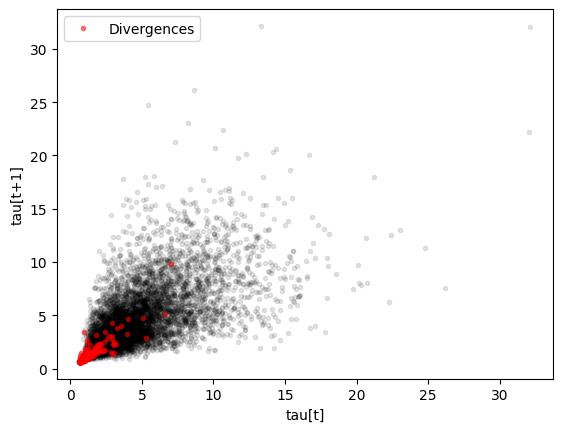

In [16]:
tau = fit_C.posterior.tau.values.ravel()  # 提取 tau 后验样本 并 展开为一维数组
diverging = fit_C.sample_stats.diverging.values.ravel()  # 提取 sample_stats 中 diverging 标记并展开为一维数组

plt.plot(tau[:-1], tau[1:], 'k.', alpha=0.1)  # 绘制相邻 tau 值的散点图
divcount = 0  # 初始化 diverging 计数器 为 0
for i, div in enumerate(diverging[:-1]):  # 遍历除最后一个元素外的 diverging 数组
    if div:  # 如果当前样本出现 divergence
        if divcount == 0:  # 如果是第一个 divergence
            plt.plot(tau[i], tau[i+1], 'r.', alpha=0.5, label="Divergences")  # 绘制红色散点, 添加标签 "Divergences"
            divcount += 1  # diverging 计数器加 1
        plt.plot(tau[i], tau[i+1], 'r.', alpha=0.5)  # 绘制其他 divergence 样本散点
plt.xlabel("tau[t]")  
plt.ylabel("tau[t+1]")  
plt.legend()  

C:\Users\14379\AppData\Local\Temp\ipykernel_23852\3433261844.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  gra = cm.get_cmap('viridis', 100)  # 使用 'viridis' colormap 分成 100 个等级


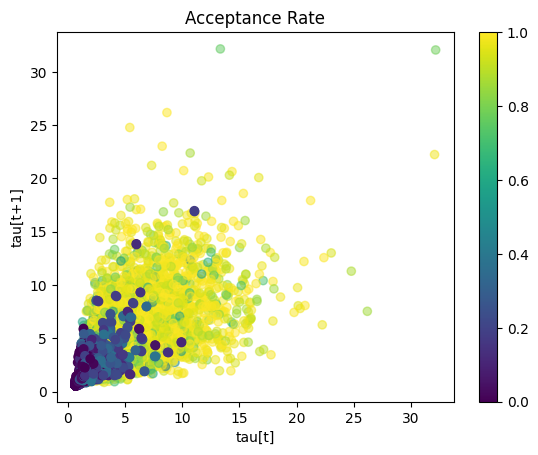

In [17]:
from matplotlib import cm  
gra = cm.get_cmap('viridis', 100)  # 使用 'viridis' colormap 分成 100 个等级

a = fit_C.sample_stats.acceptance_rate.values.ravel()  # 提取 fit_C.sample_stats.acceptance_rate 并展平为一维数组
cutoff = 0.4  # 设置 cutoff 阈值为 0.4
plt.scatter(tau[:-1][a[:-1] > cutoff], tau[1:][a[:-1] > cutoff],
            color = gra(a[:-1][a[:-1] > cutoff]), alpha = 0.5)  # 绘制 acceptance_rate 大于 cutoff 的散点

for i, ai in enumerate(a[:-1]):  # 遍历除最后一个元素外的 acceptance_rate 数组
    if ai <= cutoff:  # 如果当前 acceptance_rate 小于等于 cutoff
        plt.scatter(tau[i], tau[i+1], color = gra(ai))  # 绘制对应的散点

plt.scatter(tau[:-1][a[:-1] <= cutoff], tau[1:][a[:-1] <= cutoff],
            color = gra(a[:-1][a[:-1] <= cutoff]))  # 绘制 acceptance_rate 小于等于 cutoff 的散点
plt.title("Acceptance Rate")  
plt.xlabel("tau[t]")  
plt.ylabel("tau[t+1]")  
plt.colorbar()  

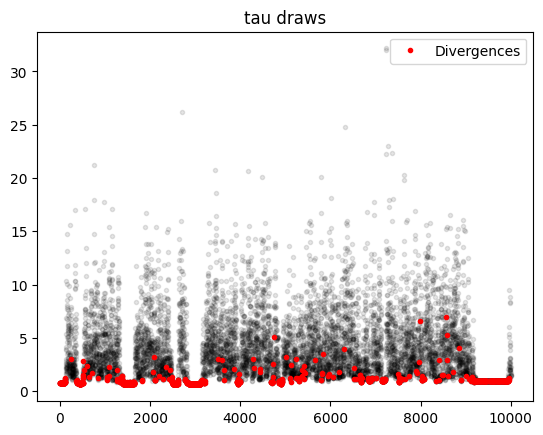

In [18]:
plt.plot(tau, 'k.', alpha=0.1)  # 绘制 tau 的散点图
divcount = 0  # 初始化 divergence 计数器为 0
for i, div in enumerate(diverging):  # 遍历 diverging 数组，i 为索引，div 为值
    if div:  # 如果发生 divergence
        if divcount == 0:  # 如果这是第一个 divergence
            plt.plot(i, tau[i], 'r.', label="Divergences")  # 绘制第一个 divergence 点，颜色为红色
            divcount += 1  # divergence 计数器加 1
        plt.plot(i, tau[i], 'r.')  # 绘制其他 divergence 点
plt.title('tau draws')  
plt.legend()  

In [ ]:
fit_C

In [ ]:
fit_C.sample_stats

C:\Users\14379\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


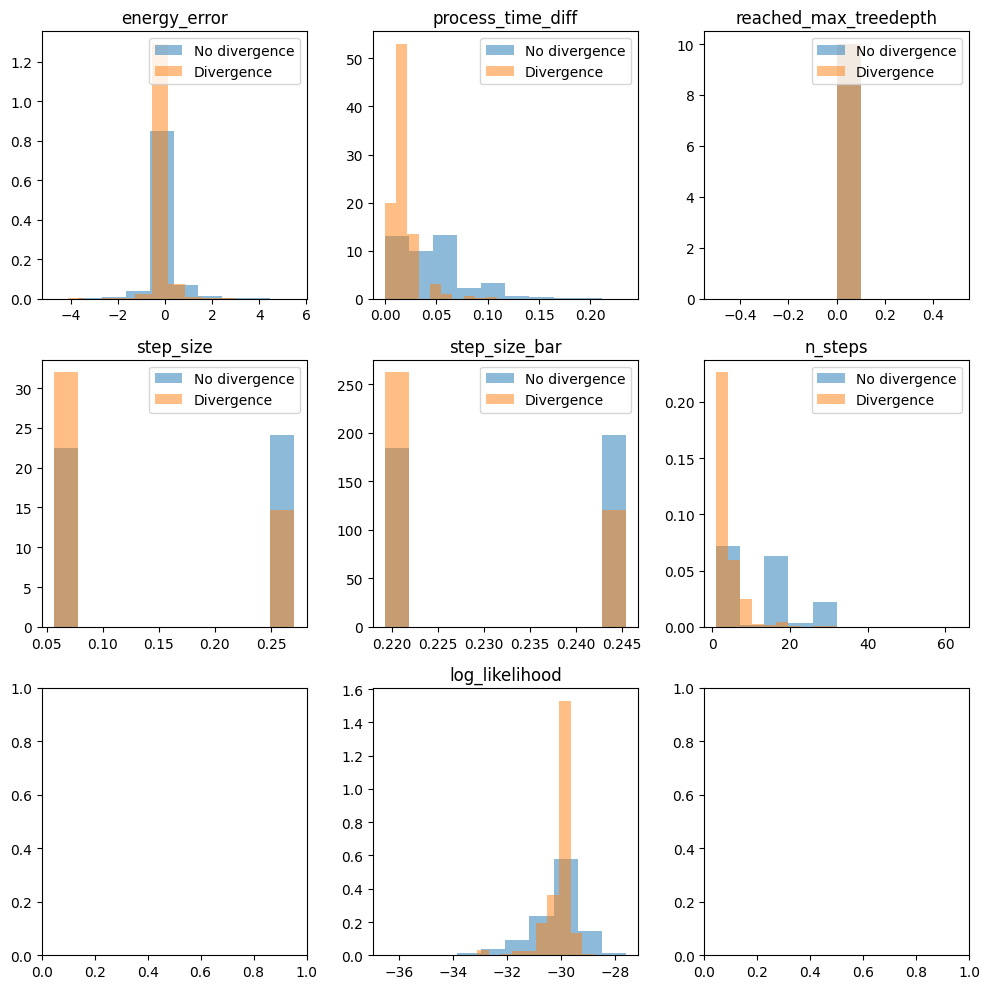

In [19]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
ax = ax.ravel()
look_at = np.array(list(fit_C.sample_stats.keys()))
look_at = look_at[[0,2,3,7,12,14]]
for i,info in enumerate(look_at):
    ax[i].hist(fit_C.sample_stats[info].values.ravel()[~diverging], 
               density=True, alpha=0.5, label='No divergence')
    ax[i].hist(fit_C.sample_stats[info].values.ravel()[diverging], 
               density=True, alpha=0.5, label='Divergence')
    ax[i].set_title(info)
    ax[i].legend()

ax[-2].hist(fit_C.log_likelihood.obs.values.sum(axis=-1).ravel()[~diverging], 
            density=True, alpha=0.5, label='No divergence')
ax[-2].hist(fit_C.log_likelihood.obs.values.sum(axis=-1).ravel()[diverging], 
            density=True, alpha=0.5, label='Divergence')
ax[-2].set_title("log_likelihood")

plt.tight_layout()

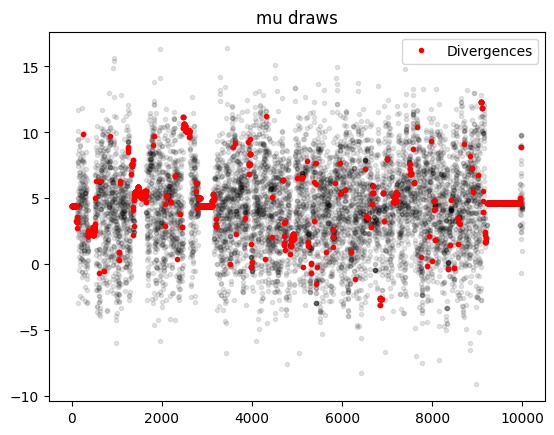

In [20]:
mu = fit_C.posterior.mu.values.ravel()  # 提取 mu 后验样本并展平为一维数组
plt.plot(mu, 'k.', alpha=0.1)  # 绘制 mu 的散点图
divcount = 0  # 初始化 divergence 计数器 为 0
for i, div in enumerate(diverging):  # 遍历 diverging 数组，i 为索引，div 为值
    if div:  # 如果发生 divergence
        if divcount == 0:  # 如果这是第一个 divergence
            plt.plot(i, mu[i], 'r.', label="Divergences")  # 绘制第一个 divergence 点
            divcount += 1  # divergence 计数器 加 1
        plt.plot(i, mu[i], 'r.')  # 绘制其他 divergence 点
        
plt.title('mu draws') 
plt.legend() 

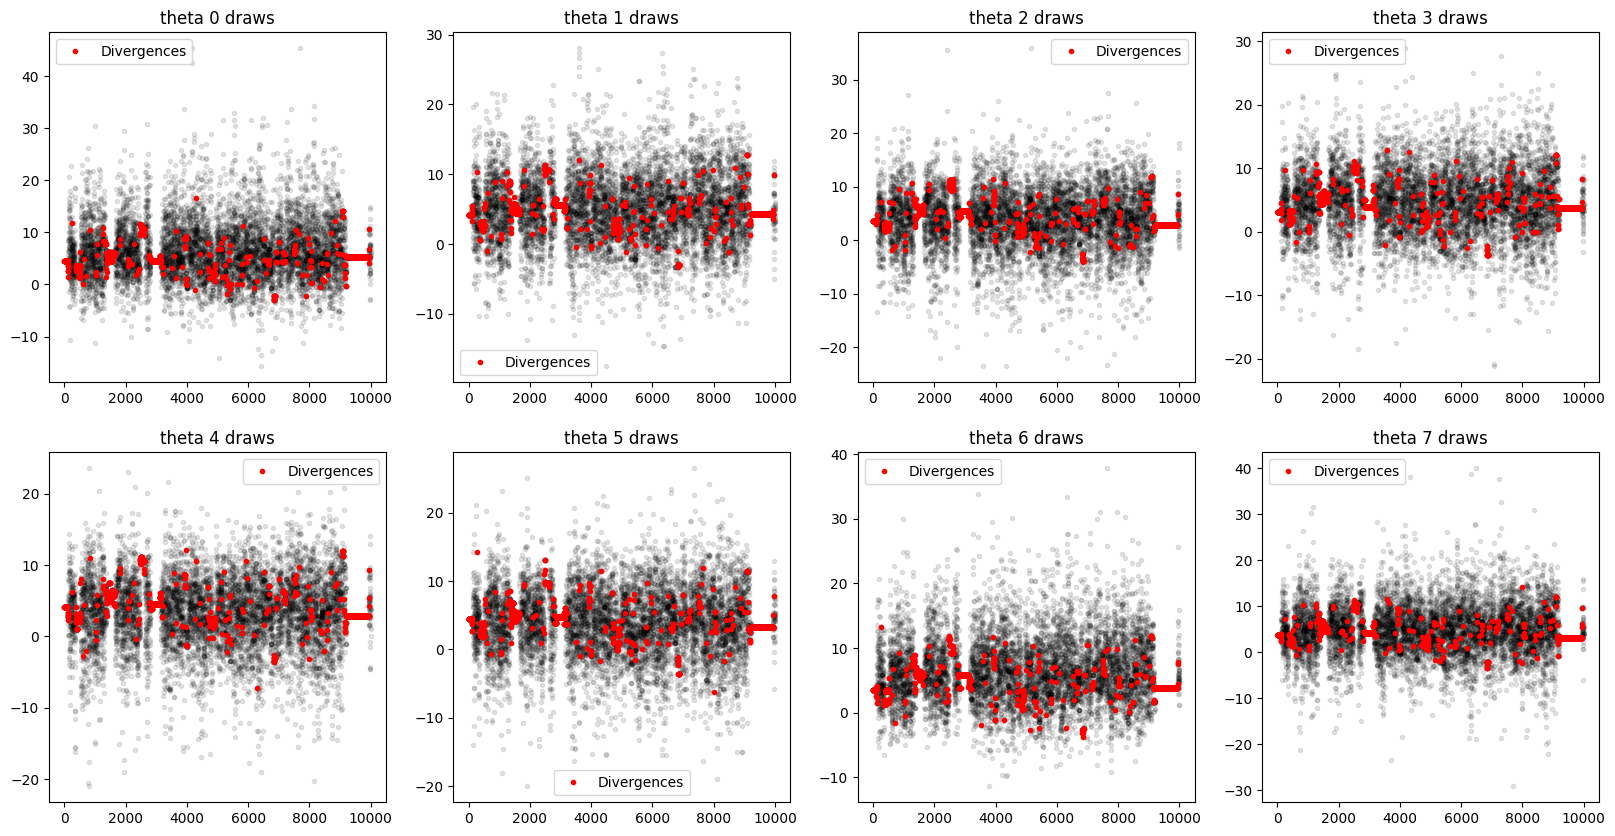

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(20,10)) 
ax = ax.ravel()  # 将子图数组展平为一维数组

for j in range(J):  # 对每个 j 从 0 到 J-1 进行循环 (J 为总个数)
    theta_j = fit_C.posterior.theta.values[:,:,j].ravel()  # 提取第 j 个 theta 后验样本, 并展平为一维数组
    ax[j].plot(theta_j, 'k.', alpha=0.1)  # 在子图 ax[j] 上绘制 theta_j 的散点图, 颜色为黑色, 透明度 alpha=0.1
    divcount = 0  # 初始化 divergence 计数器为 0
    for i, div in enumerate(diverging):  # 遍历 diverging 数组, i 为索引, div 为值
        if div:  # 如果发生 divergence
            if divcount == 0:  # 如果这是第一个 divergence
                ax[j].plot(i, theta_j[i], 'r.', label="Divergences")  # 绘制第一个 divergence 点
                divcount += 1  # divergence 计数器加 1
            ax[j].plot(i, theta_j[i], 'r.')  # 绘制其他 divergence 点
    ax[j].set_title('theta ' + str(j) + ' draws')  
    ax[j].legend()  

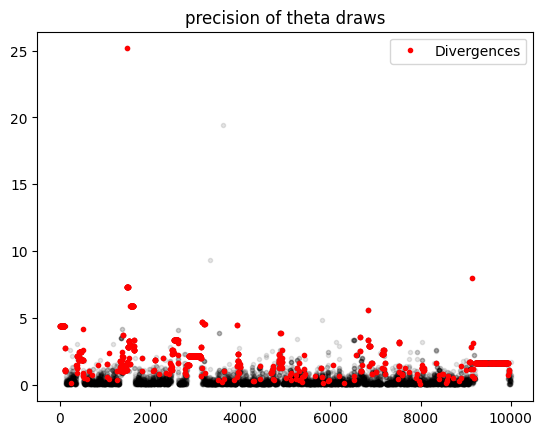

In [22]:
theta_prec = 1 / fit_C.posterior.theta.values.var(axis=-1).ravel()  # 计算 theta 的 precision , 等于 1 / variance
plt.plot(theta_prec, 'k.', alpha=0.1)  # 绘制 theta_prec 的散点图 
divcount = 0  # 初始化 divergence 计数器 为 0
for i, div in enumerate(diverging):  # 遍历 diverging 数组 , i 为索引 , div 为值
    if div:  # 如果发生 divergence
        if divcount == 0:  # 如果这是第一个 divergence
            plt.plot(i, theta_prec[i], 'r.', label="Divergences")  # 绘制第一个 divergence 点 
            divcount += 1  # divergence 计数器 加 1
        plt.plot(i, theta_prec[i], 'r.')  # 绘制其他 divergence 点 
plt.title('precision of theta draws')  
plt.legend()  

Text(0, 0.5, 'precision of thetas')

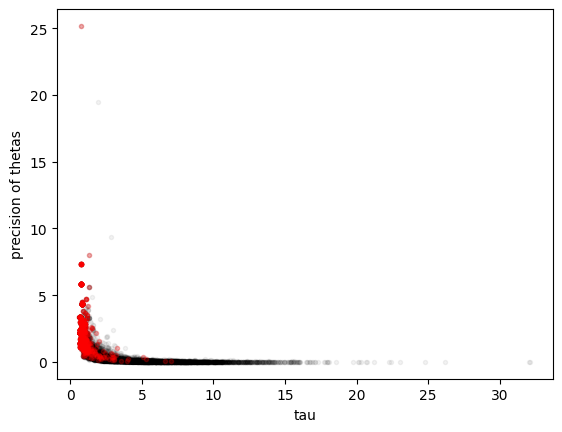

In [23]:
plt.plot(tau, theta_prec, 'k.', alpha=0.05)  # 绘制 tau 与 theta_prec 的散点图
plt.plot(tau[diverging], theta_prec[diverging], 'r.', label="Divergences", alpha=0.25)  # 绘制发生 divergence 的点
plt.xlabel('tau') 
plt.ylabel('precision of thetas')  

6


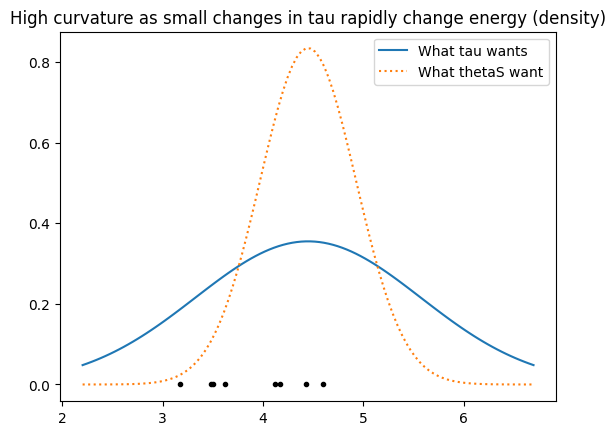

In [24]:
mu = fit_C.posterior.mu.values.ravel()  # 提取 mu 后验样本 并 展平为一维数组
thetaS = fit_C.posterior.theta.values.reshape(10000, 8)  # 将 theta 后验样本 重塑为 (10000, 8) 数组
theta = fit_C.posterior.theta.values  # 提取 theta 后验样本 原始数组
for i in range(0, len(mu) - 1):  # 对每个采样 i 进行循环
    if diverging[i]:  # 如果 第 i 个样本 发生 divergence
        s = max(tau[i] ** -0.5, thetaS[i, :].std())  # 计算 s 为 tau[i]**-0.5 与 thetaS[i, :] 的 标准差 的 最大值
        support = np.linspace(mu[i] - 2 * s, mu[i] + 2 * s, 100)  # 定义 support 为 围绕 mu[i] 的区间, 共 100 个 点
        plt.plot(support, stats.norm(mu[i], tau[i] ** -0.5).pdf(support), label="What tau wants")  # 绘制 基于 tau 的 正态分布 pdf
        plt.plot(support, stats.norm(mu[i], thetaS[i, :].std()).pdf(support), ':', label="What thetaS want")  # 绘制 基于 thetaS 的 正态分布 pdf, 线型为虚线
        plt.plot(thetaS[i, :], 0 * thetaS[i, :], 'k.')  # 绘制 thetaS 样本点在 x 轴上的分布
        # for j in range(J):
        #     plt.plot(theta[:, :, j].ravel()[i], 0, 'r.')  
        print(i)  
        plt.legend()  
        plt.title("High curvature as small changes in tau rapidly change energy (density)") 
        break  # 终止循环


In [25]:
with pymc.Model() as NonCentered_eight:
    # 当 theta 在 mu 附近具有高 precision 但与 tau 不一致时，会观察到大量 divergence
    # tau 的变化可能会导致似然函数迅速变化，即能量具有高曲率
    # 这会导致 Hamiltonian dynamics 的离散近似不足以沿着能量等高线准确行走
    # 因此算法必须通过缩短步长来减慢移动速度
    # 在这种情况下，我们可以通过重新参数化来解决这个问题

    # 假设与之前相同的先验分布
    mu = pymc.Normal("mu", mu=0, sigma=5)
    tau = pymc.HalfCauchy("tau", beta=5)

    # 现在将 theta 放在与 tau 无关的固定尺度上
    theta_tilde = pymc.Normal("theta_tilde", mu=0, sigma=1, shape=J)
    # 这样 theta 和 tau 不再冲突，避免出现高能量曲率

    # 通过重新参数化得到原始的 theta 模型
    theta = pymc.Deterministic("theta", mu + tau * theta_tilde)

    # 观测模型保持与之前完全相同
    obs = pymc.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [26]:
with NonCentered_eight:  # 在 NonCentered_eight 模型中采样
    fit_C = pymc.sample(5000, chains=2, tune=1000, idata_kwargs={"log_likelihood": True})

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, tau, theta_tilde]


Output()

Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 208 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


## Week 6 Homework

---

### Q1: Let's start having some *real* fun...

We previously considered the normal-gamma specification 

$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\alpha -1}e^{-\beta \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{\beta}{2}+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)\\{}\\
\end{align*}$$

How about instead we consider a "[location-scale-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Location-scale_t-distribution)-norm-halfnorm-discrete-uniform" specification?

$$\large
\overset{x_i\; \sim\; \text{location-scale-t}(\mu, \sigma^2, \nu)}{\quad\quad\quad p(x|\mu,\sigma^2, \nu)} = {\prod_{i=1}^n
\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \sqrt{\pi \nu \sigma^2}}\left(1+\frac{1}{\nu} \frac{(x_i-\mu)^2}{\sigma^2}\right)^{-(\nu+1) / 2}}$$

$$\scriptsize 
\begin{align}
p(\mu | \mu_0, \tau_0) &={} \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}\left(\mu-\mu_0\right)^2} & p(\sigma^2 | \sigma_0^2) &={} \sqrt{\frac{2}{\pi\sigma_0^2}} \exp \left(-\frac{(\sigma^2)^2}{2 \sigma_0^2}\right) 1_{[0,\infty]}(\sigma^2) & p(\nu=i) &={} \Bigg\{ \begin{array}{cl} \frac{1}{100} & \text{for }i=1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
& \textrm{normal} && \textrm{half-normal} && \textrm{discrete uniform}
\end{align}
$$

Um yeah we're gonna need a Metroposlis cleanup on aisles one two and three  
(or a slice or adapative squeeze rejection sampling steps... in place of Metroposlis steps)

*Implement the a Metroposlis within Gibbs algorithm to smaple from the posterior of the above specification. Use a "smallish" sample size, say $n=100$ and implement your acceptance probability on a log-scale as described in [piazza post @65_f1](https://piazza.com/class/m5jvyco84083fm/post/65_f1)*

### Q2: explore the role of sample size in providing inference for the degrees of freedom parameter $\nu$

*Implement the specification above using `PyMC` where you can explore inference on $\nu$ at different sample sizes. Provide a summarization and explanation of your findings.*



### Q3: the posterior predictive distribution does something like the following...

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\tau_i)$ be $\textrm{N}(y_i | 0,\tau_i)$ and now integrate out the uncertainty in $\tau_i$ and see what distribution is left over for $y_i$.

*Go look at the gamma distribution and remember that you know that the integrals of unnormalized densities are the inverse of their normalizing constants. Then go look at the t distribution and determine what distribution the following expression defines. Then explain why the behavior demonstrated here is analagous to that of the posterior predictive distribution.*

$$\int p(y_i|\tau_i) p(\tau_i)  d\tau_i = \int \sqrt{\frac{\tau_i}{2\pi}}e^{-\frac{1}{2}\tau_i y_i^2} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu}{2}-1}e^{-\frac{\nu}{2}\tau_i} d\tau_i$$



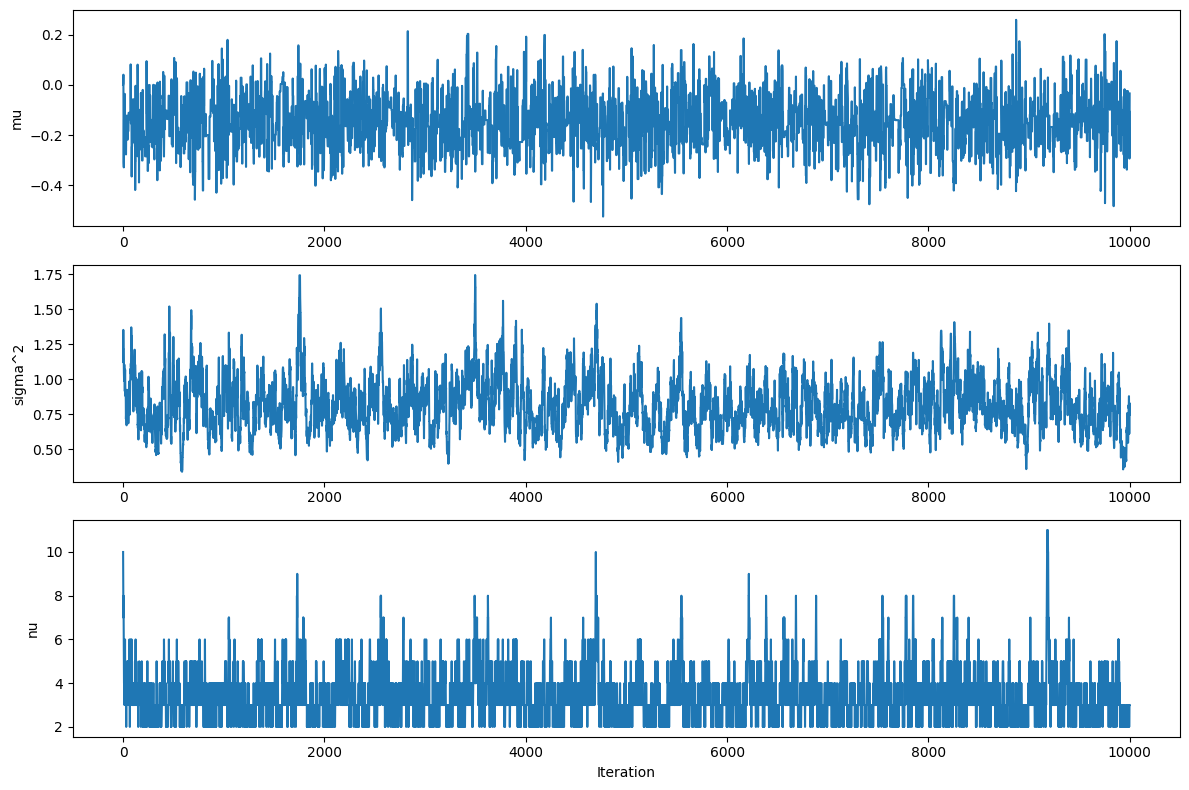

In [27]:
# Q1 

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import gammaln

np.random.seed(42)
n = 100
true_mu = 0.0
true_sigma2 = 1.0
true_nu = 5
x = true_mu + np.sqrt(true_sigma2) * stats.t.rvs(df=true_nu, size=n)

mu0 = 0.0
tau0 = 1.0
sigma0 = 1.0

def log_post(mu, sigma2, nu, x, mu0, tau0, sigma0):
    if sigma2 <= 0 or nu < 1 or nu > 100:
        return -np.inf
    ll = np.sum(gammaln((nu+1)/2) - gammaln(nu/2) - 0.5*np.log(np.pi*nu*sigma2) - ((nu+1)/2)*np.log(1 + ((x-mu)**2)/(nu*sigma2)))
    lp_mu = 0.5*np.log(tau0/(2*np.pi)) - (tau0/2)*(mu - mu0)**2
    lp_sigma2 = 0.5*np.log(2/(np.pi*sigma0**2)) - (sigma2**2)/(2*sigma0**2)
    lp_nu = -np.log(100)
    return ll + lp_mu + lp_sigma2 + lp_nu

iters = 10000
mu_samples = np.zeros(iters)
sigma2_samples = np.zeros(iters)
nu_samples = np.zeros(iters, dtype=int)

mu_current = 0.0
sigma2_current = 1.0
nu_current = 10
log_post_current = log_post(mu_current, sigma2_current, nu_current, x, mu0, tau0, sigma0)

mu_prop_sd = 0.5
log_sigma2_prop_sd = 0.1

for t in range(iters):
    mu_proposal = mu_current + np.random.normal(0, mu_prop_sd)
    log_post_proposal = log_post(mu_proposal, sigma2_current, nu_current, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current:
        mu_current = mu_proposal
        log_post_current = log_post_proposal
    mu_samples[t] = mu_current

    log_sigma2_current = np.log(sigma2_current)
    log_sigma2_proposal = log_sigma2_current + np.random.normal(0, log_sigma2_prop_sd)
    sigma2_proposal = np.exp(log_sigma2_proposal)
    log_post_proposal = log_post(mu_current, sigma2_proposal, nu_current, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current + log_sigma2_proposal - log_sigma2_current:
        sigma2_current = sigma2_proposal
        log_post_current = log_post_proposal
    sigma2_samples[t] = sigma2_current

    nu_proposal = nu_current + np.random.choice([-1, 1])
    if nu_proposal < 1:
        nu_proposal = 1
    if nu_proposal > 100:
        nu_proposal = 100
    log_post_proposal = log_post(mu_current, sigma2_current, nu_proposal, x, mu0, tau0, sigma0)
    if np.log(np.random.rand()) < log_post_proposal - log_post_current:
        nu_current = nu_proposal
        log_post_current = log_post_proposal
    nu_samples[t] = nu_current

plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(mu_samples)
plt.ylabel("mu")
plt.subplot(3,1,2)
plt.plot(sigma2_samples)
plt.ylabel("sigma^2")
plt.subplot(3,1,3)
plt.plot(nu_samples)
plt.ylabel("nu")
plt.xlabel("Iteration")
plt.tight_layout()
plt.show()

In [28]:
# Q2

import numpy as np
import pymc as pm
import arviz as az
from scipy import stats

np.random.seed(42)
sample_sizes = [50, 100, 500, 1000]
true_mu = 0.0
true_sigma = 1.0
true_nu = 5
results = {}

for n in sample_sizes:
    x = true_mu + true_sigma * stats.t.rvs(df=true_nu, size=n)
    with pm.Model() as model:
        mu = pm.Normal("mu", mu=0, sigma=5)
        sigma = pm.HalfNormal("sigma", sigma=1)
        nu = pm.DiscreteUniform("nu", lower=1, upper=100)
        obs = pm.StudentT("obs", nu=nu, mu=mu, sigma=sigma, observed=x)
        idata = pm.sample(2000, tune=1000, chains=2, target_accept=0.9, return_inferencedata=True)
    results[n] = idata

for n in sample_sizes:
    print("Sample size:", n)
    print(az.summary(results[n], var_names=["nu"]))


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 276 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 458 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2212 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 3841 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sample size: 50
     mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  56.72  26.403    12.0     98.0      0.994    0.703     702.0     772.0   

    r_hat  
nu    1.0  
Sample size: 100
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  2.152  0.541     1.0      3.0      0.029     0.02     332.0     272.0   

    r_hat  
nu    1.0  
Sample size: 500
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  7.625  2.685     4.0     12.0      0.141      0.1     294.0     361.0   

    r_hat  
nu   1.01  
Sample size: 1000
     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
nu  7.442  1.748     4.0     10.0      0.116    0.082     191.0     365.0   

    r_hat  
nu   1.01  


# Q3 

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\int_0^{\infty} \sqrt{\frac{\tau_i}{2 \pi}} \exp \left(-\frac{1}{2} \tau_i y_i^2\right) \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\nu / 2-1} \exp \left(-\frac{\nu}{2} \tau_i\right) d \tau_i
$$


Combining the powers of $\tau_i$,

$$
\sqrt{\tau_i} \tau_i^{\nu / 2-1}=\tau_i^{\frac{1}{2}+\frac{\nu}{2}-1}=\tau_i^{\frac{\nu-1}{2}}
$$

so that the integrand becomes

$$
\frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu-1}{2}} \exp \left(-\frac{1}{2} \tau_i\left(y_i^2+\nu\right)\right)
$$

Recognize that this is the kernel of a Gamma density with shape parameter

$$
a=\frac{\nu+1}{2} \quad \text { and rate } \quad b=\frac{y_i^2+\nu}{2}
$$

Thus,

$$
\int_0^{\infty} \tau_i^{a-1} e^{-b \tau_i} d \tau_i=\frac{\Gamma(a)}{b^a}
$$


It follows that

$$
\int_0^{\infty} p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\frac{1}{\sqrt{2 \pi}} \frac{\left(\frac{\nu}{2}\right)^{\nu / 2}}{\Gamma\left(\frac{\nu}{2}\right)} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\left(\frac{y_i^2+\nu}{2}\right)^{(\nu+1) / 2}}
$$


Rewriting,

$$
\frac{1}{\sqrt{2 \pi}} \frac{1}{\left(\frac{y_i^2+\nu}{2}\right)^{1 / 2}}=\frac{1}{\sqrt{\pi\left(y_i^2+\nu\right)}}
$$

and noting that

$$
\left(\frac{\nu}{2}\right)^{\nu / 2}\left(\frac{2}{y_i^2+\nu}\right)^{\frac{\nu+1}{2}}=\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}\left(\frac{2}{y_i^2+\nu}\right)^{1 / 2}
$$

we have

$$
\int p\left(y_i \mid \tau_i\right) p\left(\tau_i\right) d \tau_i=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\left(y_i^2+\nu\right)} \Gamma\left(\frac{\nu}{2}\right)}\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}
$$


Writing $\sqrt{\pi\left(y_i^2+\nu\right)}=\sqrt{\nu \pi} \sqrt{1+\frac{y_i^2}{\nu}}$ and $\left(\frac{\nu}{y_i^2+\nu}\right)^{\nu / 2}=\left(1+\frac{y_i^2}{\nu}\right)^{-\nu / 2}$, we obtain

$$
p\left(y_i\right)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{y_i^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

which is exactly the density of a Student's $t$ distribution with $\nu$ degrees of freedom, location 0 , and scale 1.

This derivation illustrates that when we integrate out the latent precision parameter $\tau_i$ (which follows a Gamma distribution) from the likelihood $p\left(y_i \mid \tau_i\right)$, the resulting marginal (or predictive) distribution for $y_i$ is a Student's $t$ distribution. This behavior is analogous to the posterior predictive distribution in hierarchical models—by integrating over uncertainty in latent parameters, we obtain a distribution with heavier tails (reflecting extra uncertainty) compared to a simple normal distribution.